In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, classification_report, confusion_matrix
import utils9

import warnings
warnings.filterwarnings("ignore")

# Credit Card Transaction Fraud Prediction - SVM

#### The data set originally contain 284,807 rows with standardized real data from credit card transactions. It is open database and the information is from european cardholders within transactions made in september 2013. Consequence of confidentiality reason, the data has been transformed using Principal Component Analysis, so all data is numeric with hided real values. PCA is a dimensionality reduction method used to simplify data mantaining significant patterns and trends. This data has been collected in a research collaboration from Worldline and Machine Learning group of The Universite Libre de Bruxelles.

##### For the SML Final Project we are looking for the columns which fits better a model in correlation to our label, choosing some of them, and assuming that they already have been scaled for data purposes. The time column will be droped, because its just counting time from the first item in the row. The amount of each transaction is maintained, as it helps identify some trends. The last column is class, which shows if the outcome is fraud or not fraud. We intend to use decision tree and support vector machine to predict simple outcome if it is fraud or not.

#### In terms of confusion matrix, the outcome for fraud or not fraud, where the first is true positive, although signaling a non fraudulent transaction as fraud can cause some headaches, the worst scenario is getting false negatives, a fraud labeled as non fraudulent transaction. So, here we want a high recall or high sensitivity, and use a greater than one beta to f-beta score, for evaluation.

In [2]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.loc[data['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


#### We have very imbalanced data set, where less than 1% of data is fraud, and this can be tricky for the model, so we will take a random sample of the same size of rows from the data, and make a new data set with half fraud and non fraud for the model.

In [4]:
# Less than one percent of the data 972 rows in the end of cleaning
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0].sample(n=492, random_state=42)

df = pd.concat([fraud_data, non_fraud_data])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121938,76376.0,-1.525978,0.796226,1.172478,-0.947111,0.077071,-1.655590,0.670737,0.051626,-0.887067,...,0.057467,-0.072446,-0.397195,0.825601,0.404932,0.923867,-0.262266,-0.133368,23.00,0
84533,60348.0,-0.705795,1.418016,0.993756,0.908646,-0.171163,-0.566892,0.367416,0.421875,-0.736533,...,0.197948,0.655792,-0.048655,0.415045,-0.287710,-0.305466,0.311077,0.161942,2.80,0
55840,47151.0,0.995185,-0.147746,-0.108914,1.168451,0.329676,1.182090,-0.316034,0.323043,0.541030,...,-0.050798,0.005680,-0.370879,-1.385989,0.746056,-0.191335,0.070408,0.041460,98.90,0
70411,53857.0,-1.197741,3.166857,-3.476764,0.818768,1.310580,-0.445066,0.384113,0.497864,0.552898,...,-0.293749,-0.264981,0.090417,-1.691177,0.032926,-0.285576,0.752378,0.345595,0.89,0


In [5]:
# Dropping the time column
df.drop(columns='Time', inplace=True)

In [6]:
# Plotting a pairplot we can see some relationship betweem columns and 'class' column, fraud or not fraud
# sns.pairplot(data=balanced_data, hue='Class')

In [7]:
df = df.reset_index(drop=True)

In [8]:
df.shape

(984, 30)

In [9]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      984 non-null    float64
 1   V2      984 non-null    float64
 2   V3      984 non-null    float64
 3   V4      984 non-null    float64
 4   V5      984 non-null    float64
 5   V6      984 non-null    float64
 6   V7      984 non-null    float64
 7   V8      984 non-null    float64
 8   V9      984 non-null    float64
 9   V10     984 non-null    float64
 10  V11     984 non-null    float64
 11  V12     984 non-null    float64
 12  V13     984 non-null    float64
 13  V14     984 non-null    float64
 14  V15     984 non-null    float64
 15  V16     984 non-null    float64
 16  V17     984 non-null    float64
 17  V18     984 non-null    float64
 18  V19     984 non-null    float64
 19  V20     984 non-null    float64
 20  V21     984 non-null    float64
 21  V22     984 non-null    float64
 22  V2

In [11]:
df.isnull().sum().max()

0

In [12]:
df.duplicated().sum()

19

In [13]:
df[df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
226,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
227,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
228,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
229,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
230,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
266,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
268,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
273,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
275,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
298,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,-12.965481,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1


In [14]:
# Drop rows where all the values in all columns are exactly the same (6 items)
df.drop([226, 227, 228, 229, 317, 318], inplace=True)

In [15]:
# Drop 6 items from the non fraud
drop_index = df[df['Class'] == 0].sample(n=6, random_state=42).index
df.drop(drop_index, inplace=True)

In [16]:
df = df.reset_index(drop=True)

In [17]:
df[df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
226,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
262,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
264,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
269,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
271,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
294,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,-12.965481,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1
296,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,...,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,316.06,1
299,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,-15.239962,...,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,78.00,1
301,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,-14.924655,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
303,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,-13.202577,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,30.31,1


In [18]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,...,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,-2.231449,1.749340,-3.481913,2.248454,-1.506878,-0.755491,-2.671199,0.473000,-1.267828,-2.786884,...,0.274704,0.025994,-0.036835,-0.054323,0.032891,0.014316,0.101361,0.035819,102.396409,0.500000
std,5.397836,3.566331,6.096076,3.208416,4.158147,1.685595,5.640314,4.213372,2.319773,4.484051,...,2.196249,1.016869,1.119676,0.580192,0.679863,0.469501,0.945434,0.408946,222.891246,0.500257
min,-30.552380,-8.402154,-31.103685,-4.519509,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.178778,-7.263482,-1.869290,0.000000,0.000000
25%,-2.732232,-0.153887,-5.056297,-0.149800,-1.747276,-1.625389,-3.031843,-0.216462,-2.363040,-4.543693,...,-0.164947,-0.540504,-0.246863,-0.396519,-0.310603,-0.297013,-0.063086,-0.056989,1.290000,0.000000
50%,-0.776143,0.927999,-1.363977,1.299311,-0.333575,-0.682460,-0.618928,0.147397,-0.715968,-0.858985,...,0.138787,0.038201,-0.037683,0.011322,0.053477,-0.011590,0.042484,0.031852,17.445000,0.500000
75%,1.134074,2.777569,0.208581,4.229802,0.493738,0.055643,0.286374,0.885713,0.192528,0.029417,...,0.652748,0.553477,0.190901,0.382373,0.405028,0.291455,0.455031,0.211523,99.990000,1.000000
max,2.351891,22.057729,3.143387,12.114672,11.095089,6.474115,5.802537,20.007208,5.232322,9.386945,...,27.202839,8.361985,6.008724,1.205581,2.208209,2.745261,3.052358,1.779364,2125.870000,1.000000


In [37]:
df.shape

(972, 30)

([<matplotlib.axis.XTick at 0x1fad5e04550>,
 [Text(0, 0, 'Non Fraud'), Text(1, 0, 'Fraud')])

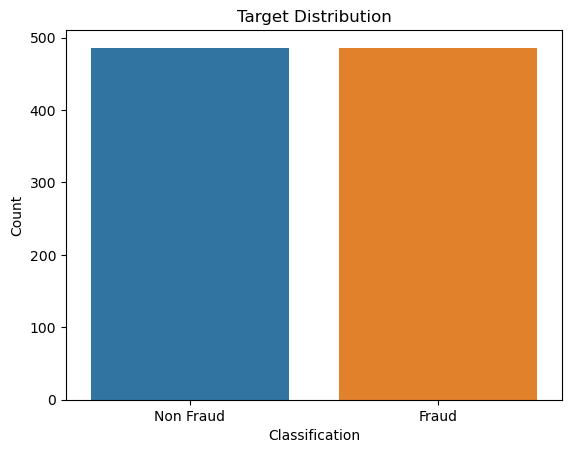

In [19]:
sns.countplot(x='Class', data=df)
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title("Target Distribution")
plt.xticks([0, 1], ['Non Fraud', 'Fraud'])

In [20]:
X = df.drop(['Class'], axis=1)
y = df['Class']

##### Split train, test and validation set choice:
#### Although training accuracy was quite similar to each of them, the log loss was a bit lower with split at 90%, 5%, 5%.
| Split | Training Accuracy | Validation Accuracy | Validation Log Loss |
| ----: | ----: | ----: | ----: |
| (70%, 15%, 15%) | 95.29% | 94.52% | 0.1469 |
| (80%, 10%, 10%) | 95.10% | 93.88% | 0.1858 |
|  (90%, 5%, 5%) | 95.65% | 91.84% | 0.1077 |

In [21]:
train_ratio = 0.9
test_ratio = 0.05
validation_ratio = 0.05

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))

print("Train set size:", (X_train.shape), "test set size:", X_test.shape, "validation set size:", X_valid.shape)

Train set size: (874, 29) test set size: (49, 29) validation set size: (49, 29)


In [22]:
svm = SVC(kernel='linear', probability=True)       # sigmoid (41%), rbf (80%), poly degree 5 (56%), linear (95%)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [23]:
train_predictions = svm.predict(X_train)
validation_predictions = svm.predict(X_valid)

In [24]:
train_accuracy = accuracy_score(y_train, train_predictions)
valid_accuracy = accuracy_score(y_valid, validation_predictions)

print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Validation Accuracy: {valid_accuracy*100:.2f}%')

Training Accuracy: 95.65%
Validation Accuracy: 93.88%


In [25]:
train_probabilities = svm.predict_proba(X_train)
valid_probabilities = svm.predict_proba(X_valid)

train_log_loss = log_loss(y_train, train_probabilities)
valid_log_loss = log_loss(y_valid, valid_probabilities)

print(f'Training Log Loss: {train_log_loss:.4f}')
print(f'Validation Log Loss: {valid_log_loss:.4f}')

Training Log Loss: 0.1368
Validation Log Loss: 0.1977


### Both only linear and rbf were used as kernel, because they valued enough when tested above
### First when using grid search values for gamma and C were before determined avoiding long time issue
### For a random search random values were gave, which made the model search for better values
### The use of decision_function_shape one against one or one against rest did not make impact to final result

#### Model #2, grid search, using diverse gamma (spread) and C (margin)

In [28]:
param_grid = {
    'C': [10],                         # [0.1, 1, 10, 100] 
    'gamma': [0.1],                    # [1, 0.1, 0.01, 0.001]
    'kernel': ['linear', 'rbf']        # ['linear', 'rbf']
}

In [29]:
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [10], 'gamma': [0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [30]:
best_params_gs = grid_search.best_params_
best_score_gs = grid_search.best_score_
model_m2 = grid_search.best_estimator_

In [31]:
print("Best parameters for grid search model:", best_params_gs)
print("Best score for grid search model:", best_score_gs)

Best parameters for grid search model: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best score for grid search model: 0.9255960591133003


#### Model #5, randomized search, using scipy.stats module, which exposes the model to a distribution of sampling parameters

In [35]:
param_random = {
    'C': [8.3],                             # 'C': scipy.stats.expon(scale=100), 
    'gamma': [0.05],                        # scipy.stats.expon(scale=.1),
    'kernel': ['linear'],                   # ['rbf', 'linear'], 
    'class_weight': [None]                  # ['balanced', None]
}

In [36]:
random_search = RandomizedSearchCV(svm, param_random, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True),
                   param_distributions={'C': [8.3], 'class_weight': [None],
                                        'gamma': [0.05], 'kernel': ['linear']},
                   scoring='accuracy')

In [38]:
best_params_rs = random_search.best_params_
best_score_rs = random_search.best_score_
model_m5 = random_search.best_estimator_

In [39]:
print("Best parameters for random search model:", best_params_rs)
print("Best score for random search model:", best_score_rs)

Best parameters for random search model: {'kernel': 'linear', 'gamma': 0.05, 'class_weight': None, 'C': 8.3}
Best score for random search model: 0.927888341543514


### Classification Report and Confusion Matrix

In [40]:
y_train_m2 = model_m2.predict(X_train)
y_valid_m2 = model_m2.predict(X_valid)

In [41]:
print("Classification report Grid Search training data:\n")
print(classification_report(y_train, y_train_m2))

Classification report Grid Search training data:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       434
           1       0.99      0.93      0.96       440

    accuracy                           0.96       874
   macro avg       0.96      0.96      0.96       874
weighted avg       0.96      0.96      0.96       874



In [42]:
print("Classification report Grid Search validation data:\n")
print(classification_report(y_valid, y_valid_m2))

Classification report Grid Search validation data:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.87      0.93        23

    accuracy                           0.94        49
   macro avg       0.95      0.93      0.94        49
weighted avg       0.95      0.94      0.94        49



In [43]:
print("Grid Search training data confusion matrix:\n")
print(confusion_matrix(y_train, y_train_m2))

Grid Search training data confusion matrix:

[[429   5]
 [ 30 410]]


In [44]:
print("Grid Search validation data confusion matrix:\n")
print(confusion_matrix(y_valid, y_valid_m2))

Grid Search validation data confusion matrix:

[[26  0]
 [ 3 20]]


In [45]:
y_train_m5 = model_m5.predict(X_train)
y_valid_m5 = model_m5.predict(X_valid)

In [46]:
print("Classification report Random Search training data:\n")
print(classification_report(y_train, y_train_m5))

Classification report Random Search training data:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       434
           1       0.99      0.93      0.96       440

    accuracy                           0.96       874
   macro avg       0.96      0.96      0.96       874
weighted avg       0.96      0.96      0.96       874



In [47]:
print("Classification report Random Search validation data:\n")
print(classification_report(y_valid, y_valid_m5))

Classification report Random Search validation data:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.87      0.93        23

    accuracy                           0.94        49
   macro avg       0.95      0.93      0.94        49
weighted avg       0.95      0.94      0.94        49



In [48]:
print("Random Search training data confusion matrix:\n")
print(confusion_matrix(y_train, y_train_m5))

Random Search training data confusion matrix:

[[430   4]
 [ 29 411]]


In [49]:
print("Random Search validation data confusion matrix:\n")
print(confusion_matrix(y_valid, y_valid_m5))

Random Search validation data confusion matrix:

[[26  0]
 [ 3 20]]


### In this case both models are equal fine, and the hyperparameters are just tuned for the grid search or random search. Better kernel were linear, polynomial and sigmoid stayed far, while rbf came closer, but not enough to impact. Low gamma means the model may have high bias, reinforcing the linear boundary (shape/tune decision of the limits). With C the model sharpen the limit of the plane. 
|  | Model 2 | Model 5 |
| :---- | ----: | ----: |
| kernel | linear | linear |
| gamma | 0.1 | 0.05 |
| C | 10 | 8.3 |